In [ ]:
# Import relevant libraries
import os
import pandas as pd
from comparative_gsa.sample_input_space import sample_input_space
from comparative_gsa.simulate_data import simulate_data
from comparative_gsa.calculate_output_features import calculate_output_features
from SALib.analyze.sobol import analyze

In [ ]:
param_path = '../inputs/parameters_naghavi_constrained_fixed_T_v_tot.json'
# Get the filename from the path, without extension
param_filename = os.path.splitext(os.path.basename(param_path))[0]

n_samples = 34816

simulation_out_path = f'../outputs/simulations/output_{n_samples}_samples_{param_filename}/'


In [3]:
# Load input_544_samples.csv
input_csv = os.path.join(simulation_out_path, "input_samples_544.csv")
X = pd.read_csv(input_csv)
print("Loaded input samples:", X.shape)

# Load simulation_summary.csv
summary_csv = os.path.join(simulation_out_path, "simulations_summary.csv")
Y = pd.read_csv(summary_csv)
print("Loaded simulation summary:", Y.shape)

Loaded input samples: (544, 35)
Loaded simulation summary: (544, 32)


In [ ]:
output_feature = "p_ao_mean"  # Change to any column name in Y
Y_feature = Y[output_feature].values  # .values converts to numpy array.
Y_feature.shape

(544,)

In [5]:
relevant_columns = ['ao.r',
 'ao.c',
 'art.r',
 'art.c',
 'ven.r',
 'ven.c',
 'av.r',
 'mv.r',
 'la.E_pas',
 'la.E_act',
 'la.v_ref',
 'la.k_pas',
 'lv.E_pas',
 'lv.E_act',
 'lv.v_ref',
 'lv.k_pas']

problem = {
    'num_vars': len(relevant_columns),
    'names': relevant_columns,
    'bounds' : X[relevant_columns].describe().loc[['min', 'max']].T.values
}

In [6]:
# Do the sobol_analyse for GSA
sobol_indices = analyze(problem, Y_feature, calc_second_order=True)

16


/Users/lbokeria/projects/health_gc/cvd_net_project/comparative-gsa/venv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


In [9]:
from autoemulate.core.sensitivity_analysis import SensitivityAnalysis
from autoemulate.core.sensitivity_analysis import _sobol_results_to_df 

In [10]:
results = {
    output_feature: sobol_indices
}

In [12]:
sobol_df = _sobol_results_to_df(results)

/Users/lbokeria/projects/health_gc/cvd_net_project/comparative-gsa/venv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


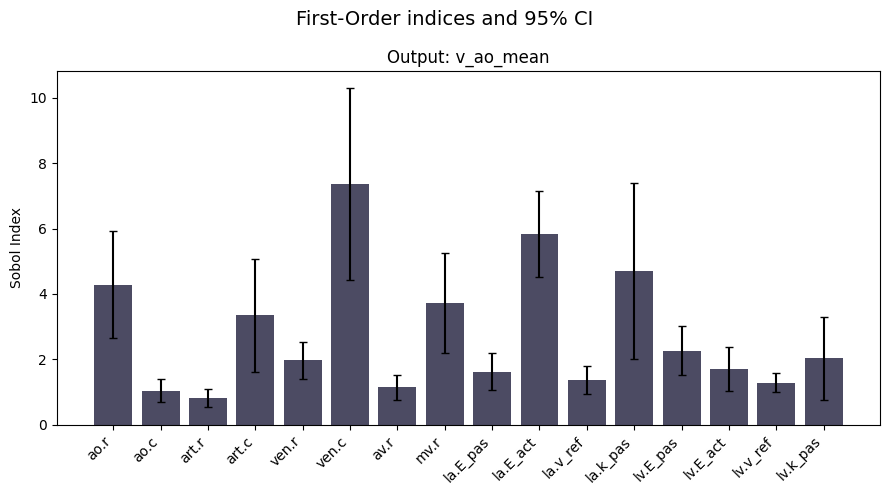

In [ ]:
figsize = (9, 5)

SensitivityAnalysis.plot_sobol(sobol_df, index="S1", figsize=figsize) 

print('WARNING: S1 plot is ST and vice-versa!!!')